In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

# Categorical Maker

In [7]:
def CategoricalConverter(column):
    onehotencoder = OneHotEncoder()
    prod = onehotencoder.fit_transform(pd.DataFrame(column)).toarray() # Convertir a categórico
    prod = pd.DataFrame(prod, columns = np.sort(column.unique())) #Hacer un df con columnas
    return prod

# Transacciones

In [8]:
trs = pd.read_csv('../Bases/Transaccion_train.csv')
trs.drop(['Unnamed: 0' , 'Id_Producto' , 'Tipo' , 'Fecha'] , axis = 1 , inplace = True)

In [9]:
trs

,id,Producto-Tipo,Signo,Monto,Periodo
0,1,F-D,Positivo,377142.843750,201901
1,1,F-D,Positivo,577142.875000,201903
2,1,F-D,Positivo,548571.437500,201904
3,1,F-D,Positivo,291428.562500,201905
4,1,F-D,Positivo,405714.281250,201906
...,...,...,...,...,...
24397532,79539,G-K,Negativo,196444.718750,202006
24397533,79539,G-K,Negativo,128644.289062,202006
24397534,79539,G-K,Negativo,124086.859375,202006
24397535,79539,A-G,NaN,185393.000000,201912


In [10]:
len(trs['Producto-Tipo'].unique())

16

## Eliminando los Nan de las Transacciones

In [11]:
trs2 = trs.copy()
trs2.set_index('id' , inplace = True)
trs2.dropna(inplace = True) #se eliminaron 1.439.192 filas

In [12]:
trs.isnull().sum() 

id                     0
Producto-Tipo          0
Signo            1439192
Monto                  0
Periodo                0
dtype: int64

In [13]:
trs2.isnull().sum()

Producto-Tipo    0
Signo            0
Monto            0
Periodo          0
dtype: int64

## Conversión Monto a Positivo o Negativo

In [14]:
signo = trs2['Signo'].values
montoSigno = []
for i in signo:
    if i == 'Positivo':
        montoSigno.append(1)
    else:
        montoSigno.append(-1)
montoSigno = np.array(montoSigno)
montoSigno

array([ 1,  1,  1, ..., -1, -1, -1])

In [15]:
monto = trs2['Monto'].values
trs2['MontoSigno'] = np.multiply(monto,montoSigno) # Multiplicación
trs2.drop(['Signo' , 'Monto'] , axis = 1 , inplace = True)
trs2.reset_index(inplace = True)

## Pivot Table Por Producto

In [16]:
dfprod = pd.pivot_table(trs2 , values = 'MontoSigno' , index = 'id' , columns = ['Producto-Tipo'] , fill_value = 0 , aggfunc = np.sum)

In [17]:
dfprod.reset_index(drop = True , inplace = True)

## Correlaciones inter producto

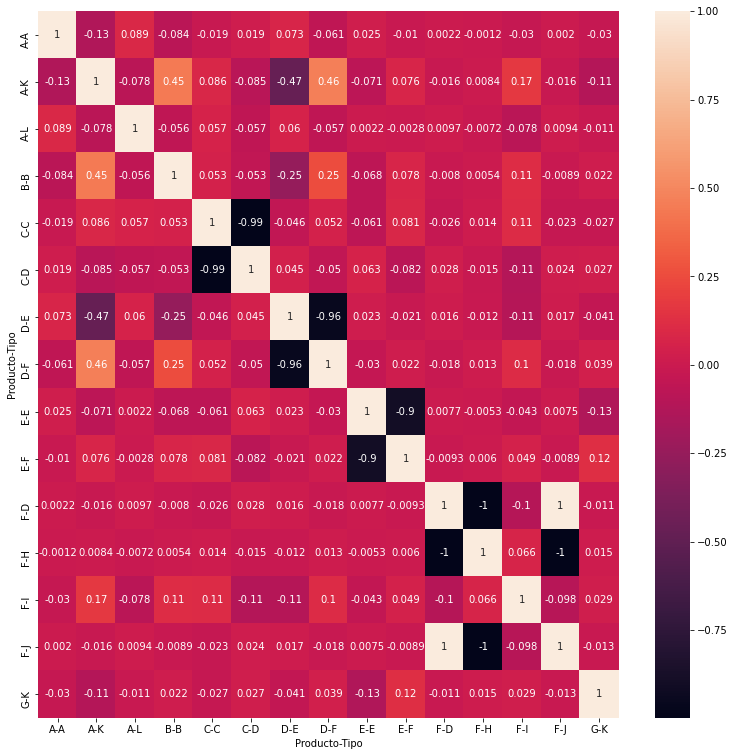

In [21]:
correlations = dfprod.corr()
f,ax = plt.subplots(figsize = (13,13))
sns.heatmap(correlations,annot=True)

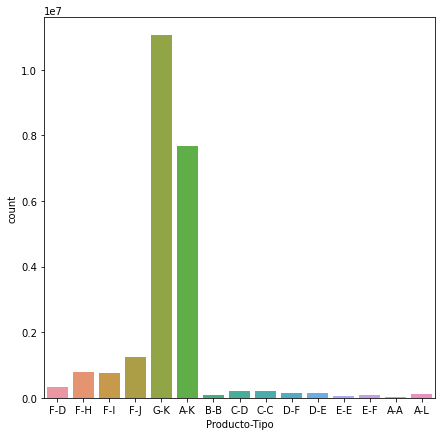

In [13]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'Producto-Tipo' , data = trs2)

## Análisis de elementos eliminados: Todos los eliminados son del producto A-G

In [14]:
trs2['Producto-Tipo'].value_counts().sum()

22958345

In [15]:
trs['Producto-Tipo'].value_counts().sum()

24397537

In [16]:
trs['Producto-Tipo'].value_counts().sum() - trs2['Producto-Tipo'].value_counts().sum()

1439192

In [17]:
pd.DataFrame(trs2['Producto-Tipo'].value_counts())

,Producto-Tipo
G-K,11043005
A-K,7686507
F-J,1243863
F-H,799214
F-I,767294
F-D,324810
C-D,209807
C-C,203159
D-E,157763
D-F,149576


In [18]:
pd.DataFrame(trs['Producto-Tipo'].value_counts())

,Producto-Tipo
G-K,11043005
A-K,7686507
A-G,1439192
F-J,1243863
F-H,799214
F-I,767294
F-D,324810
C-D,209807
C-C,203159
D-E,157763


In [43]:
trs2.groupby('Producto-Tipo').sum()['MontoSigno'].sum()

-2122178697190.0918

In [44]:
dfprod.sum().sum()

-2122178697190.0918

In [45]:
dfprod

Producto-Tipo,A-A,A-K,A-L,B-B,C-C,C-D,D-E,D-F,E-E,E-F,F-D,F-H,F-I,F-J,G-K
0,0.00000,-3.686182e+07,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0,0,0,7.321078e+06,-7.561078e+06,-1.549649e+06,7.561078e+06,-5.770217e+06
1,0.00000,-2.367750e+07,0.000000e+00,-293498,-1.605180e+07,1.905354e+07,1601860,-1699501,501007,-384461,2.664929e+07,-1.151481e+06,-9.371714e+06,2.784929e+07,-4.938157e+07
2,234285.71875,-3.556323e+07,1.120000e+06,-120000,0.000000e+00,0.000000e+00,0,0,1147862,-1367568,1.802073e+06,-2.282073e+06,-6.012641e+05,2.282073e+06,-2.034374e+07
3,362857.15625,-9.662305e+06,1.697867e+05,-317254,0.000000e+00,0.000000e+00,121142,-491115,742421,-618740,6.297714e+07,-6.345714e+07,-1.440000e+06,6.513714e+07,-2.362493e+07
4,0.00000,-9.319559e+06,0.000000e+00,-518916,0.000000e+00,0.000000e+00,243570,-243570,243985,-363838,2.811429e+06,-4.611429e+06,-4.491429e+06,4.611429e+06,-3.446029e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79534,0.00000,-1.767045e+07,0.000000e+00,-369855,0.000000e+00,0.000000e+00,856382,-854239,240930,-240947,2.292857e+06,-2.115000e+06,-3.372857e+06,3.492857e+06,-3.040691e+07
79535,0.00000,-1.738624e+07,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0,0,0,2.034100e+06,-1.539227e+06,-3.234100e+06,2.971243e+06,-3.196310e+07
79536,0.00000,-2.513137e+05,0.000000e+00,0,-8.082290e+06,1.049500e+07,125658,0,497344,-495712,8.725352e+06,-3.198913e+06,0.000000e+00,8.965352e+06,0.000000e+00
79537,0.00000,-1.027632e+07,0.000000e+00,-129712,0.000000e+00,0.000000e+00,245428,-245428,0,-241000,2.760000e+05,-1.588571e+06,-1.828571e+06,2.196000e+06,-7.167486e+06


# Producto por Periodo por Persona

In [48]:
trsfinal = trs.copy()
trsfinal.set_index('id' , inplace = True)
trsfinal.dropna(inplace = True) #se eliminaron 1.439.192 filas

In [50]:
trsfinal.head()

,Producto-Tipo,Signo,Monto,Periodo
id,,,,
1,F-D,Positivo,377142.84375,201901
1,F-D,Positivo,577142.87500,201903
1,F-D,Positivo,548571.43750,201904
1,F-D,Positivo,291428.56250,201905
1,F-D,Positivo,405714.28125,201906


In [51]:
signo = trsfinal['Signo'].values

In [53]:
montoSigno = []
for i in signo:
    if i == 'Positivo':
        montoSigno.append(1)
    else:
        montoSigno.append(-1)
montoSigno = np.array(montoSigno)
monto = trsfinal['Monto'].values
trsfinal['MontoSigno'] = np.multiply(monto,montoSigno) # Multiplicación
trsfinal.drop(['Signo' , 'Monto'] , axis = 1 , inplace = True)
trsfinal.reset_index(inplace = True)

In [54]:
trsfinal

,id,Producto-Tipo,Periodo,MontoSigno
0,1,F-D,201901,377142.843750
1,1,F-D,201903,577142.875000
2,1,F-D,201904,548571.437500
3,1,F-D,201905,291428.562500
4,1,F-D,201906,405714.281250
...,...,...,...,...
22958340,79539,G-K,202006,-127007.000000
22958341,79539,G-K,202006,-196444.718750
22958342,79539,G-K,202006,-128644.289062
22958343,79539,G-K,202006,-124086.859375


# Pivot Table Por Periodo y Producto

In [57]:
pivot = pd.pivot_table(trsfinal , values = 'MontoSigno' , index = 'id' , columns = ['Periodo' ,'Producto-Tipo'] , fill_value = 0 , aggfunc = np.sum)

In [71]:
pivot.values[0][1]

-2946055.125

In [89]:
len(pivot.loc[1].loc[201907])

14

In [85]:
periodos = np.sort(trsfinal['Periodo'].unique())

In [86]:
largos = []
for i in periodos:
    largos.append(len(pivot.loc[1].loc[i]))

In [87]:
largos

[15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [88]:
periodos

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007], dtype=int64)

In [95]:
pivot.columns[0]

(201901, 'A-A')

In [127]:
pivotUnnamed = pd.DataFrame(pivot.values)

# Obtenido Nombre de las Columnas

In [133]:
pivot.columns[0]

(201901, 'A-A')

In [148]:
p = pivot.columns.values
cols = []
for i in range(len(pivot.columns)):
    d = {
        'Period': p[i][0],
        'Product' : p[i][1],
        'Code' : str(p[i][0]) + "/"  + p[i][1]
    }
    cols.append(d)

In [150]:
cols = pd.DataFrame(cols)

In [153]:
pivotUnnamed = pivotUnnamed.T

In [155]:
pivotUnnamed['Code'] = cols['Code']

In [163]:
pivotUnnamed.set_index('Code' , inplace = True)

,0,1,2,3,4,5,6,7,8,9,...,79529,79530,79531,79532,79533,79534,79535,79536,79537,79538
Code,,,,,,,,,,,,,,,,,,,,,
201901/A-A,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.200000e+05,0.000000e+00,0.000,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00
201901/A-K,-2946055.125,-7.726436e+05,-2.058363e+06,-3.697169e+05,-909150.640625,-4.859402e+05,-1.919411e+06,-6073407.125,-1.246777e+06,-120071.429688,...,-800391.273438,-247902.976562,0.0,0.0,0.000000e+00,-4.966949e+05,-2.425587e+05,0.00000,-628190.007812,0.000000e+00
201901/A-L,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00
201901/B-B,0.000,0.000000e+00,0.000000e+00,-1.251420e+05,0.000000,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000,...,0.000000,-140893.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00
201901/C-C,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000,-1.269360e+06,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,-2.195344e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202007/F-D,1062857.125,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.200000e+05,0.000000e+00,0.000,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000e+00,6.914286e+05,1.357143e+05,514285.71875,0.000000,0.000000e+00
202007/F-H,-1062857.125,-1.200000e+05,-1.200000e+05,0.000000e+00,-120000.000000,-4.200000e+05,-1.200000e+05,0.000,-1.200000e+05,-120000.000000,...,-120000.000000,-120000.000000,0.0,0.0,0.000000e+00,-6.914286e+05,0.000000e+00,-514285.71875,-120000.000000,0.000000e+00
202007/F-I,-1062857.125,0.000000e+00,0.000000e+00,-1.200000e+05,0.000000,-4.200000e+05,-1.200000e+05,0.000,0.000000e+00,0.000000,...,-120000.000000,-120000.000000,-120000.0,0.0,-1.200000e+05,-6.914286e+05,-1.357143e+05,0.00000,-120000.000000,0.000000e+00


In [165]:
pivotUnnamed = pivotUnnamed.T

In [166]:
pivotUnnamed

Code,201901/A-A,201901/A-K,201901/A-L,201901/B-B,201901/C-C,201901/C-D,201901/D-E,201901/D-F,201901/E-E,201901/E-F,...,202007/C-D,202007/D-E,202007/D-F,202007/E-E,202007/E-F,202007/F-D,202007/F-H,202007/F-I,202007/F-J,202007/G-K
0,0.0,-2.946055e+06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.062857e+06,-1.062857e+06,-1.062857e+06,1.062857e+06,0.000000e+00
1,0.0,-7.726436e+05,0.0,0.0,0.0,0.00,0.0,-122842.0,0.0,0.0,...,3694527.0,121141.0,-121366.0,0.0,0.0,0.000000e+00,-1.200000e+05,0.000000e+00,1.200000e+05,-2.244552e+06
2,0.0,-2.058363e+06,0.0,0.0,0.0,0.00,0.0,0.0,132120.0,0.0,...,0.0,0.0,0.0,0.0,-134305.0,0.000000e+00,-1.200000e+05,0.000000e+00,1.200000e+05,-8.659600e+05
3,0.0,-3.697169e+05,0.0,-125142.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-124285.0,0.000000e+00,0.000000e+00,-1.200000e+05,1.200000e+05,-1.038586e+06
4,0.0,-9.091506e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-120225.0,0.000000e+00,-1.200000e+05,0.000000e+00,1.200000e+05,-6.564539e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79534,0.0,-4.966949e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,122049.0,-122049.0,0.0,0.0,6.914286e+05,-6.914286e+05,-6.914286e+05,6.914286e+05,-2.717147e+06
79535,0.0,-2.425587e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.357143e+05,0.000000e+00,-1.357143e+05,1.357143e+05,-2.211187e+06
79536,0.0,0.000000e+00,0.0,0.0,0.0,0.00,0.0,0.0,124590.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.142857e+05,-5.142857e+05,0.000000e+00,5.142857e+05,0.000000e+00
79537,0.0,-6.281900e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,-1.200000e+05,-1.200000e+05,1.200000e+05,-1.221414e+05


In [170]:
pivotUnnamed['id'] = pivot.index.values

In [173]:
pivotUnnamed.set_index('id' , inplace = True)

In [174]:
pivotUnnamed

Code,201901/A-A,201901/A-K,201901/A-L,201901/B-B,201901/C-C,201901/C-D,201901/D-E,201901/D-F,201901/E-E,201901/E-F,...,202007/C-D,202007/D-E,202007/D-F,202007/E-E,202007/E-F,202007/F-D,202007/F-H,202007/F-I,202007/F-J,202007/G-K
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,-2.946055e+06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.062857e+06,-1.062857e+06,-1.062857e+06,1.062857e+06,0.000000e+00
2,0.0,-7.726436e+05,0.0,0.0,0.0,0.00,0.0,-122842.0,0.0,0.0,...,3694527.0,121141.0,-121366.0,0.0,0.0,0.000000e+00,-1.200000e+05,0.000000e+00,1.200000e+05,-2.244552e+06
3,0.0,-2.058363e+06,0.0,0.0,0.0,0.00,0.0,0.0,132120.0,0.0,...,0.0,0.0,0.0,0.0,-134305.0,0.000000e+00,-1.200000e+05,0.000000e+00,1.200000e+05,-8.659600e+05
4,0.0,-3.697169e+05,0.0,-125142.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-124285.0,0.000000e+00,0.000000e+00,-1.200000e+05,1.200000e+05,-1.038586e+06
5,0.0,-9.091506e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-120225.0,0.000000e+00,-1.200000e+05,0.000000e+00,1.200000e+05,-6.564539e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79535,0.0,-4.966949e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,122049.0,-122049.0,0.0,0.0,6.914286e+05,-6.914286e+05,-6.914286e+05,6.914286e+05,-2.717147e+06
79536,0.0,-2.425587e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.357143e+05,0.000000e+00,-1.357143e+05,1.357143e+05,-2.211187e+06
79537,0.0,0.000000e+00,0.0,0.0,0.0,0.00,0.0,0.0,124590.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.142857e+05,-5.142857e+05,0.000000e+00,5.142857e+05,0.000000e+00
